In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
num_classes

10

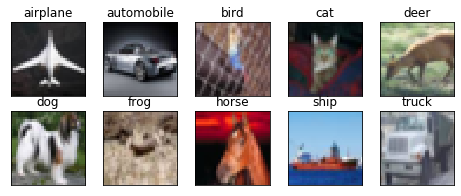

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
train_features.shape

(50000, 32, 32, 3)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_835 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_836 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_392 (MaxPoolin (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_631 (Dropout)        (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 34s 88ms/step - loss: 1.8211 - acc: 0.2970 - val_loss: 1.4239 - val_acc: 0.4755
Epoch 2/50
390/390 [==============================] - 10s 26ms/step - loss: 1.3490 - acc: 0.5099 - val_loss: 1.1319 - val_acc: 0.5863
Epoch 3/50
390/390 [==============================] - 10s 26ms/step - loss: 1.1229 - acc: 0.6006 - val_loss: 1.0084 - val_acc: 0.6467
Epoch 4/50
390/390 [==============================] - 10s 26ms/step - loss: 0.9640 - acc: 0.6642 - val_loss: 0.8329 - val_acc: 0.7132
Epoch 5/50
390/390 [==============================] - 10s 26ms/step - loss: 0.8633 - acc: 0.7015 - val_loss: 0.7719 - val_acc: 0.7352
Epoch 6/50
390/390 [==============================] - 10s 26ms/step - loss: 0.7786 - acc: 0.7335 - val_loss: 0.7604 - val_acc: 0.7379
Epoch 7/50
390/390 [==============================] - 10s 26ms/step - loss: 0.7311 - acc: 0.7505 - val_loss: 0.6866 - val_acc: 0.7635
Epoch 8/50
390/390 [==============================] - 10s 26ms

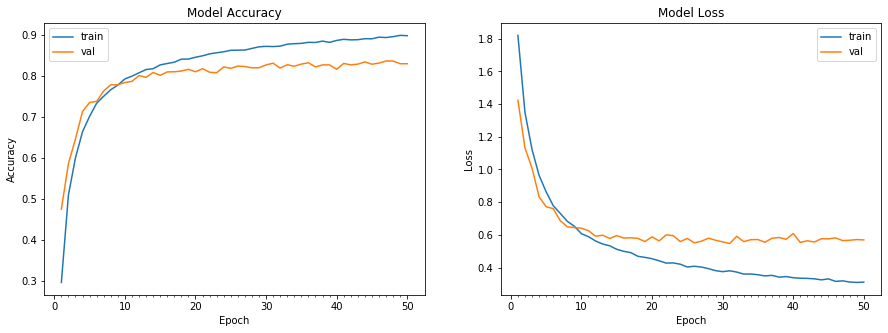

Accuracy on test data is: 82.96


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Modified Model



In [0]:
from keras.layers import SeparableConv2D, InputLayer
from keras.utils.layer_utils import count_params

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

In [0]:
def build_model():
    dropout = 0.1
    model = Sequential()
    model.add(InputLayer(train_features.shape[1:]))

    def conv(out_size, **kwargs):
        model.add(SeparableConv2D(out_size, 3, padding='same', **kwargs))
        model.add(BatchNormalization())
        model.add(Activation('relu'))

    def maxp():
        model.add(MaxPooling2D(2))
        model.add(Dropout(dropout))

    conv(64) # output size = 32 x 32 x 64 | receptive field = 3
    
    conv(64) # output size = 32 x 32 x 64 | receptive field = 5
    
    maxp() # output size = 16 x 16 x 64 | receptive field = 6
    
    conv(96) # output size = 16 x 16 x 96 | receptive field = 10
    
    conv(96) # output size = 16 x 16 x 96 | receptive field = 14
    
    maxp() # output size = 8 x 8 x 96 | receptive field = 16
    
    conv(108) # output size = 8 x 8 x 108 | receptive field = 24
    
    conv(108) # output size = 8 x 8 x 108 | receptive field = 32
    
    maxp() # output size = 4 x 4 x 108 | receptive field = 36
    
    conv(128) # output size = 4 x 4 x 128 | receptive field = 52
    
    conv(128) # output size = 4 x 4 x 128 | receptive field = 68
    
    maxp() # output size = 2 x 2 x 128 | receptive field = 76
    
    conv(98) # output size = 2 x 2 x 98 | receptive field = 108
    
    maxp() # output size = 1 x 1 x 98 | receptive field = 124

    model.add(SeparableConv2D(num_classes, 3, padding='same', activation='softmax')) # output size = 1 x 1 x 10 | receptive field = 188
    model.add(Flatten())
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

model = build_model()
model.summary()

Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1074 (Separ (None, 32, 32, 64)        283       
_________________________________________________________________
batch_normalization_843 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1104 (Activation) (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_1075 (Separ (None, 32, 32, 64)        4736      
_________________________________________________________________
batch_normalization_844 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1105 (Activation) (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_524 (MaxPoolin (None, 16, 16, 64)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 76s 195ms/step - loss: 1.5864 - acc: 0.4187 - val_loss: 2.3093 - val_acc: 0.3563
Epoch 2/50
390/390 [==============================] - 38s 98ms/step - loss: 1.1384 - acc: 0.5927 - val_loss: 1.3032 - val_acc: 0.5774
Epoch 3/50
390/390 [==============================] - 38s 98ms/step - loss: 0.9945 - acc: 0.6466 - val_loss: 0.9522 - val_acc: 0.6667
Epoch 4/50
390/390 [==============================] - 38s 97ms/step - loss: 0.8996 - acc: 0.6794 - val_loss: 1.1868 - val_acc: 0.5915
Epoch 5/50
390/390 [==============================] - 38s 97ms/step - loss: 0.8352 - acc: 0.7068 - val_loss: 1.0512 - val_acc: 0.6527
Epoch 6/50
390/390 [==============================] - 38s 98ms/step - loss: 0.7929 - acc: 0.7214 - val_loss: 0.9189 - val_acc: 0.6820
Epoch 7/50
390/390 [==============================] - 38s 97ms/step - loss: 0.7465 - acc: 0.7386 - val_loss: 0.9655 - val_acc: 0.6813
Epoch 8/50
390/390 [==============================] - 38s 97m

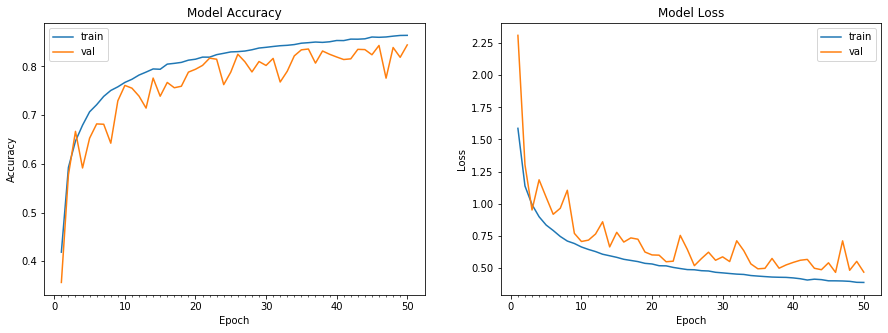

Accuracy on test data is: 84.43


In [0]:
model = build_model()

# stolen from https://keras.io/examples/cifar10_cnn/
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by dataset std
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in 0 to 180 degrees
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1,  # randomly shift images vertically
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0
)

datagen.fit(train_features)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(
    datagen.flow(
        train_features, 
        train_labels,
        batch_size = 128
    ),
    samples_per_epoch = train_features.shape[0], 
    nb_epoch = 50, 
    validation_data = (test_features, test_labels), 
    verbose=1,     
)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.summary()